# Distribtions

In [1]:
from statworx_theme import apply_style

# apply style
apply_style()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

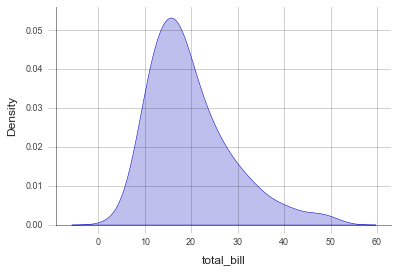

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill", fill=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

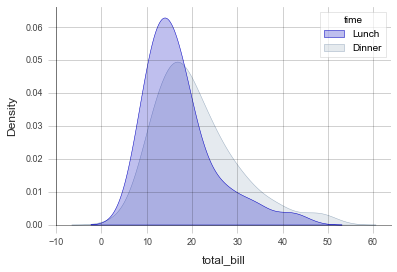

In [3]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True, common_norm=False)

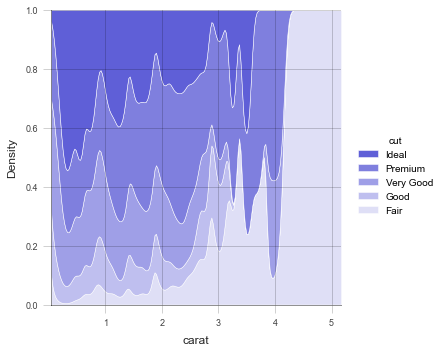

In [4]:
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat",
    hue="cut",
    kind="kde",
    multiple="fill",
    clip=(0, None),
    palette="stwx:Bl_fade",
)

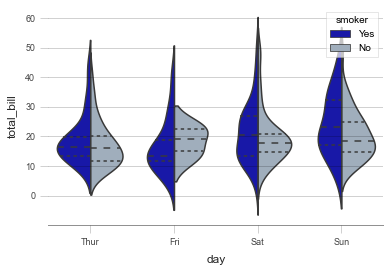

In [5]:
import seaborn as sns

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="smoker",
    split=True,
    inner="quart",
)
sns.despine(left=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

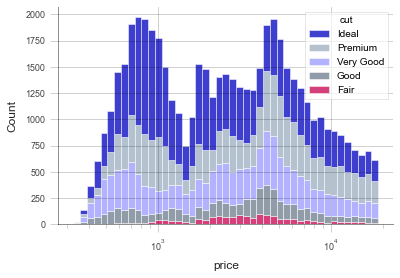

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

diamonds = sns.load_dataset("diamonds")

sns.histplot(
    diamonds,
    x="price",
    hue="cut",
    multiple="stack",
    log_scale=True,
)

/Users/anhoang/Projekte/2022/Internal/statworx-theme/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/anhoang/Projekte/2022/Internal/statworx-theme/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/anhoang/Projekte/2022/Internal/statworx-theme/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/anhoang/Projekte/2022/Internal/statworx-theme/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tigh

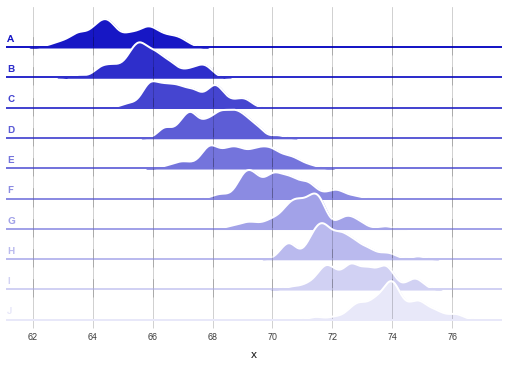

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=0.5, palette="stwx:Bl_fade")

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Timeseries

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

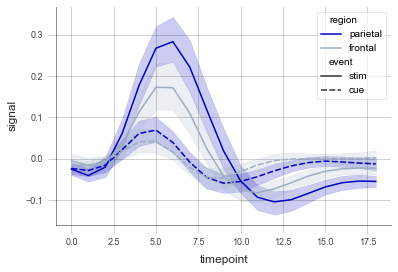

In [8]:
import seaborn as sns

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

<AxesSubplot:>

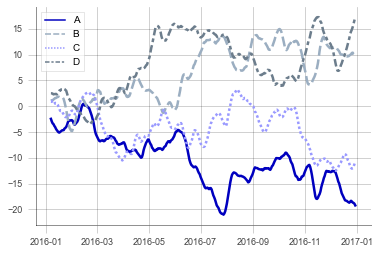

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, linewidth=2.5)

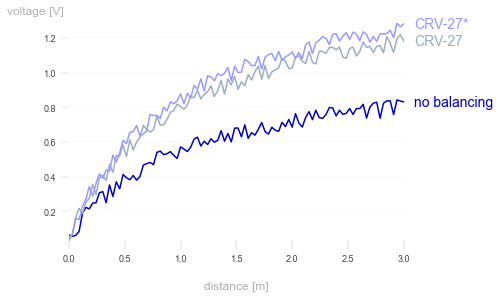

In [10]:
import matplotlib.pyplot as plt
import matplotx
import numpy as np

# create data
rng = np.random.default_rng(0)
offsets = [1.0, 1.50, 1.60]
labels = ["no balancing", "CRV-27", "CRV-27*"]
x0 = np.linspace(0.0, 3.0, 100)
y = [offset * x0 / (x0 + 1) + 0.1 * rng.random(len(x0)) for offset in offsets]

# plot
for yy, label in zip(y, labels):
    plt.plot(x0, yy, label=label)
plt.xlabel("distance [m]")
matplotx.ylabel_top("voltage [V]")  # move ylabel to the top, rotate
matplotx.line_labels()  # line labels to the right
plt.show()

# Relationship

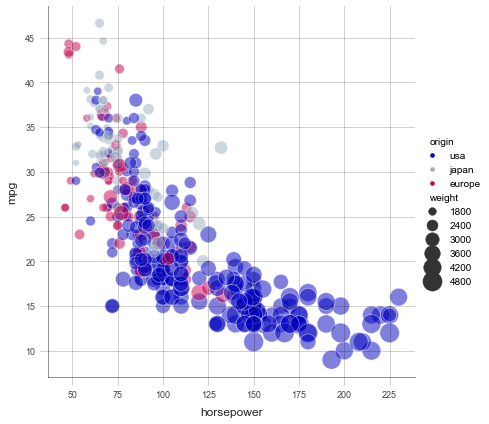

In [11]:
import seaborn as sns

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(
    x="horsepower",
    y="mpg",
    hue="origin",
    size="weight",
    sizes=(40, 400),
    alpha=0.5,
    palette="stwx:alternative",
    height=6,
    data=mpg,
)

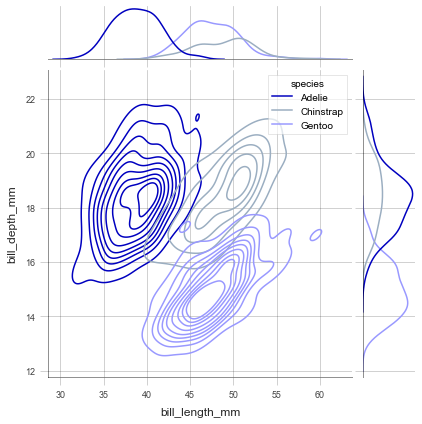

In [12]:
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="kde",
)

/Users/anhoang/Projekte/2022/Internal/statworx-theme/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


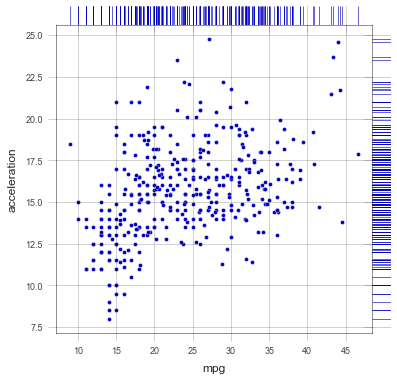

In [13]:
import seaborn as sns

mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, legend=False)
g.plot_marginals(sns.rugplot, height=1, alpha=0.6)

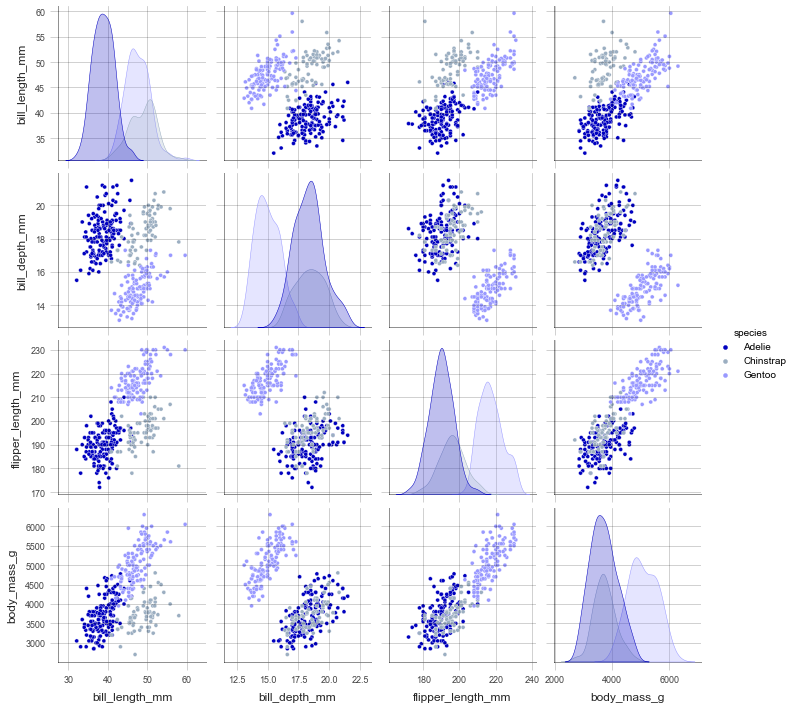

In [14]:
import seaborn as sns

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot:>

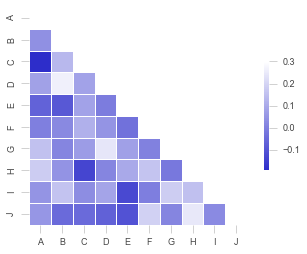

In [15]:
from string import ascii_letters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(
    data=rs.normal(size=(100, 10)), columns=list(ascii_letters[26 : 26 + 10])
)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="stwx:Bl_fade",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# Comparison

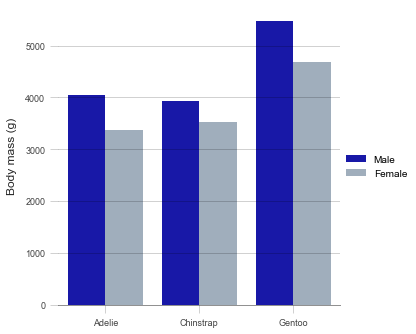

In [16]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar", x="species", y="body_mass_g", hue="sex", ci=None
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

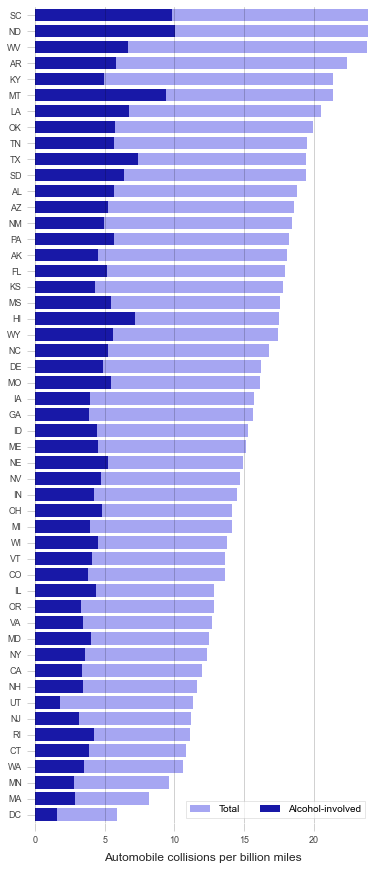

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from statworx_theme.colors import BLUE, LIGHT_BLUE

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes, label="Total", color=LIGHT_BLUE)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes, label="Alcohol-involved", color=BLUE)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# Difference

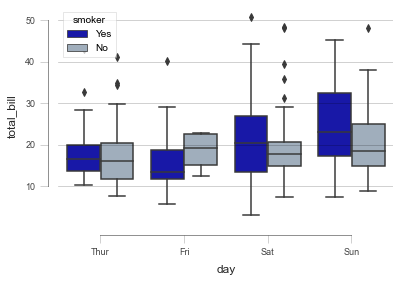

In [18]:
import seaborn as sns

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)
sns.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Lorem Ipsum Dolor Sit Amet')

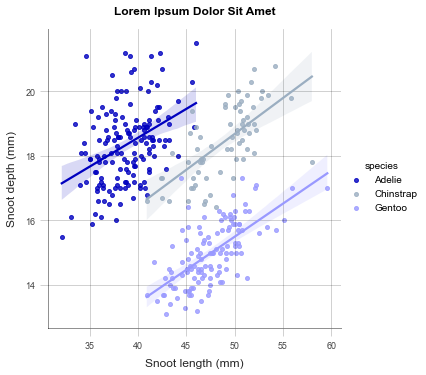

In [19]:
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")
plt.title("Lorem Ipsum Dolor Sit Amet")

[Text(0, 0.5, '')]

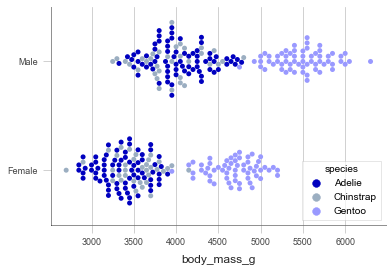

In [20]:
import seaborn as sns

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")

<AxesSubplot:xlabel='clarity', ylabel='carat'>

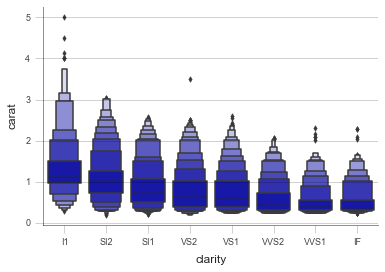

In [21]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(
    x="clarity",
    y="carat",
    color=BLUE,
    order=clarity_ranking,
    scale="linear",
    data=diamonds,
)

# Sample Plot for README

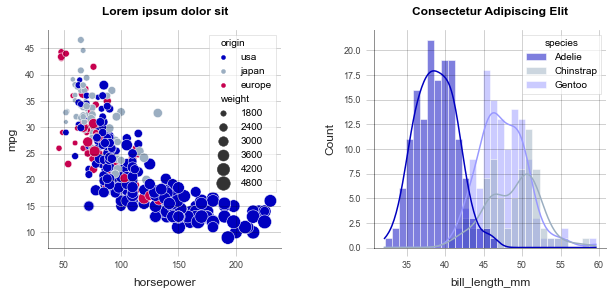

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

################################################################################
# Plot 1
################################################################################

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.scatterplot(
    x="horsepower",
    y="mpg",
    hue="origin",
    size="weight",
    sizes=(20, 200),
    palette="stwx:alternative",
    data=mpg,
    ax=axs[0],
)
axs[0].set_title("Lorem ipsum dolor sit")

################################################################################
# Plot 2
################################################################################

penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
sns.histplot(
    bins=30, data=penguins, x="bill_length_mm", hue="species", kde=True, ax=axs[1]
)
axs[1].set_title("Consectetur Adipiscing Elit")

################################################################################
# Adjustments
################################################################################

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig("../docs/assets/sample.svg")
